# 4.2.5 [Boston Marathon Clustering](https://courses.thinkful.com/data-201v1/project/4.2.5)

In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn import metrics
from sklearn.decomposition import PCA

%matplotlib inline

marathon = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")

In [23]:
print("Shape:\n{}".format(marathon.shape))
print("\nNulls:\n{}".format(marathon[['ctz','state', 'city']].isnull().sum()))

Shape:
(31984, 21)

Nulls:ctz      30740
state     2576
city         1
dtype: int64


In [28]:
print("Shape:\n{}".format(marathon.shape))
print("\nNulls:\n{}".format(marathon[['ctz','state', 'city']].isnull().sum()))
print("\nDatatypes:\n{}".format(marathon.dtypes))
print(marathon[~marathon['ctz'].isna()].head())
print("\nDataset preview:\n")
marathon.head()

Shape:
(31984, 21)

Nulls:
ctz      30740
state     2576
city         1
dtype: int64

Datatypes:
10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object
       10k                  name  division    25k gender  age  official  bib  \
27   18.78          Kim, Gyu Dae        15  50.33      M   30     89.52  W14   
36   19.37        Gordian, Aaron        17  54.20      M   49     95.28  W17   
59   21.47      Pulido, Jose Sr.        28  58.30      M   33    104.08  W27   
101  30.82  Jami, Segundo O. Sr.        24  78.88      M   27    140.87   45   
110  32.53          Sanca, Ruben        21  81.0

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [51]:
marathon = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")

marathon_distance = ['5k', '10k', 'half', '25k', '30k', '35k', '40k', 'pace']
geo = ['ctz', 'state', 'country', 'city']
demo = ['gender', 'age', ]
features = [marathon_distance + ['overall']]

In [52]:
# Remove '-' so times can be turned into float
marathon = marathon.replace('-', 0)

# Turn numbers into floats
for feature in marathon_distance:
    marathon[feature] = marathon[feature].astype('float')

numeric = marathon[marathon_distance+['age', 'official', 'overall', 'pace']]

normalized = pd.DataFrame(normalize(numeric), columns=numeric.columns)

In [42]:
numeric.describe()

,age,official,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000
mean,42.407079,242.997314,15939.587825,9.275658
std,11.316496,52.300431,9232.978224,1.992486
min,18.000000,80.600000,1.000000,3.080000
25%,33.000000,205.527500,7943.750000,7.850000
50%,42.000000,232.370000,15939.500000,8.870000
75%,50.000000,273.235000,23935.250000,10.430000
max,81.000000,538.880000,31931.000000,20.570000


In [66]:
kf = KFold(n_splits = 4, shuffle=True, random_state=42)

In [67]:
for train_index, test_index in kf.get_n_splits(normalized):
    model = KMeans

4

In [68]:
df.split(normalized)

<generator object _BaseKFold.split at 0x1a0e62c5c8>

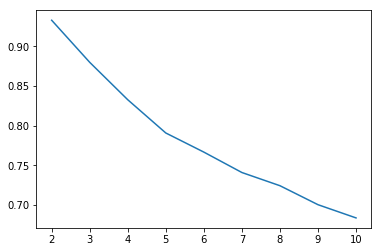

In [72]:
# 4 equal splits
kf = KFold(n_splits = 4, shuffle=True, random_state=42)

n_clusters = np.arange(2,11)
silhouette_means = []
silhouette_stds = []

for num in n_clusters:
    
    silhouette_scores = []
    for train, test in kf.split(df_normal):
        model = KMeans(n_clusters=num, random_state=42).fit(normalized.iloc[test,:])
        labels = model.labels_
        score = metrics.silhouette_score(normalized.iloc[test,:], labels, metric='euclidean')
        
        silhouette_scores.append(score)
        
    silhouette_means.append(np.mean(silhouette_scores))
    silhouette_stds.append(np.std(silhouette_scores))
    
plt.plot(n_clusters, silhouette_means)
plt.show()

In [76]:
# Fitting to the entire dataset
model = KMeans(n_clusters=2, random_state=42).fit(normalized)
labels = model.labels_

# unique, counts = np.unique(labels, return_counts=True)
# dict(zip(unique, counts))

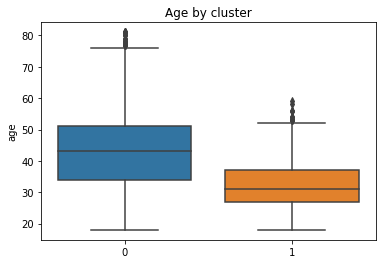

In [77]:
sns.boxplot(labels,marathon['age'])
plt.title("{} by cluster".format("Age"))
plt.show()

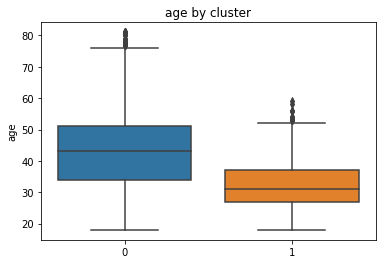

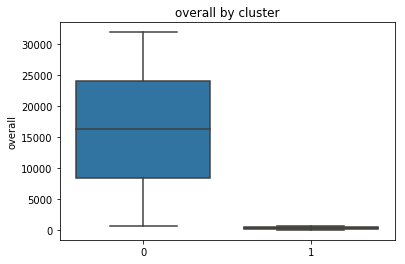

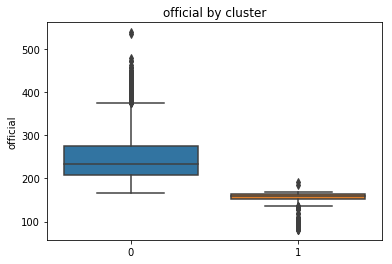

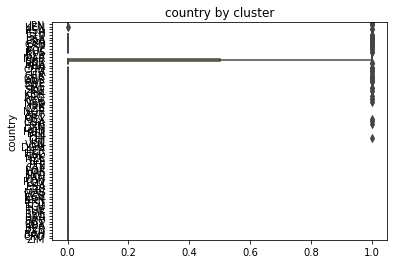

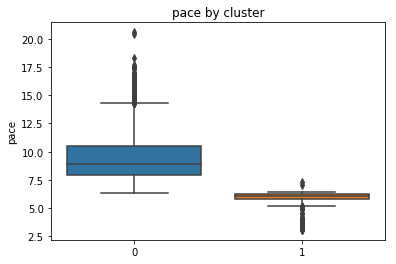

In [79]:
for col in ['age','overall','official', 'country', 'pace']:
    sns.boxplot(labels,marathon[col])
    plt.title("{} by cluster".format(col))
    plt.show()

It looks like there is a group of general people and then walkers/on the faster end. 

# Mean Shift

In [ ]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(normalized, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


# Spectral Clustering

In [80]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(normalized, quantile=0.2, n_samples=500)

for train, test in kf.split(normalized):
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(normalized.iloc[test,:])

    # Extract cluster assignments for each data point.
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
# Coordinates of the cluster centers.
    score = metrics.silhouette_score(normalized.iloc[test,:], 
                                     labels, metric='euclidean')
    print(n_clusters_)
    print(score)
#                                      ms.cluster_centers_

# # Count our clusters.
# n_clusters_ = len(np.unique(labels))

# print("Number of estimated clusters: {}".format(n_clusters_))


15
0.8503613935767366
18
0.7333769577814094
12
0.8679423928481416
10
0.8327514800456981


In [87]:
# Fitting to the dataset as a whole
model = MeanShift(bandwidth=bandwidth).fit(normalized)
marathon['labels'] = model.labels_

# unique, counts = np.unique(labels, return_counts=True)
# dict(zip(unique, counts))

In [89]:
marathon = marathon.sort_values(by='pace')

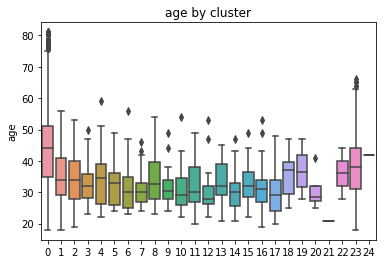

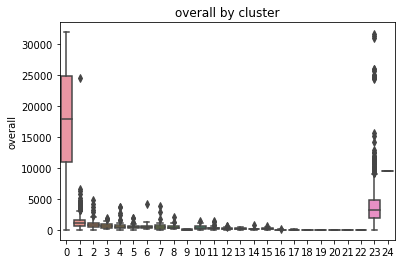

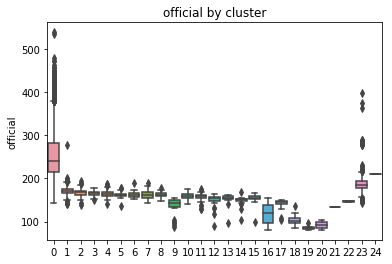

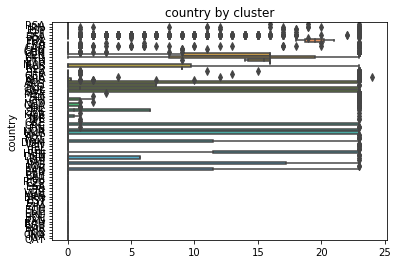

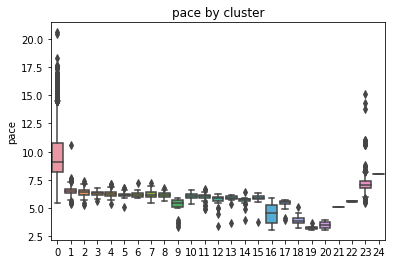

In [91]:
for col in ['age','overall','official','country','pace']:
    sns.boxplot(labels,marathon[col])
    plt.title("{} by cluster".format(col))
    plt.show()

In [83]:
pd.crosstab(labels, marathon['gender'])

gender,F,M
row_0,,
0,14028,13924
1,22,527
2,3,66
3,1,41
4,0,50
5,1,39
6,0,29
7,3,26
8,0,26


In [ ]:
from sklearn.cluster import AffinityPropagation
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
for train, test in kf.split(normalized):
    model = AffinityPropagation()
    model.fit(normalized.iloc[test,:])


# Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = model.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = model.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


In [102]:
# 4 equal splits
kf = KFold(n_splits = 4, shuffle=True, random_state=42)

n_clusters = np.arange(3,10)
silhouette_means = []
silhouette_stds = []

for num in n_clusters:
    
    silhouette_scores = []
    for train, test in kf.split(normalized):
        model = SpectralClustering(n_clusters=num)
        model.fit(normalized.iloc[test,:])
        labels = model.labels_
        score = metrics.silhouette_score(normalized.iloc[test,:], 
                                         labels, metric='euclidean')
        
        silhouette_scores.append(score)
        
    silhouette_means.append(np.mean(silhouette_scores))
    silhouette_stds.append(np.std(silhouette_scores))
    
plt.plot(n_clusters, silhouette_means)
plt.show()

KeyboardInterrupt: 

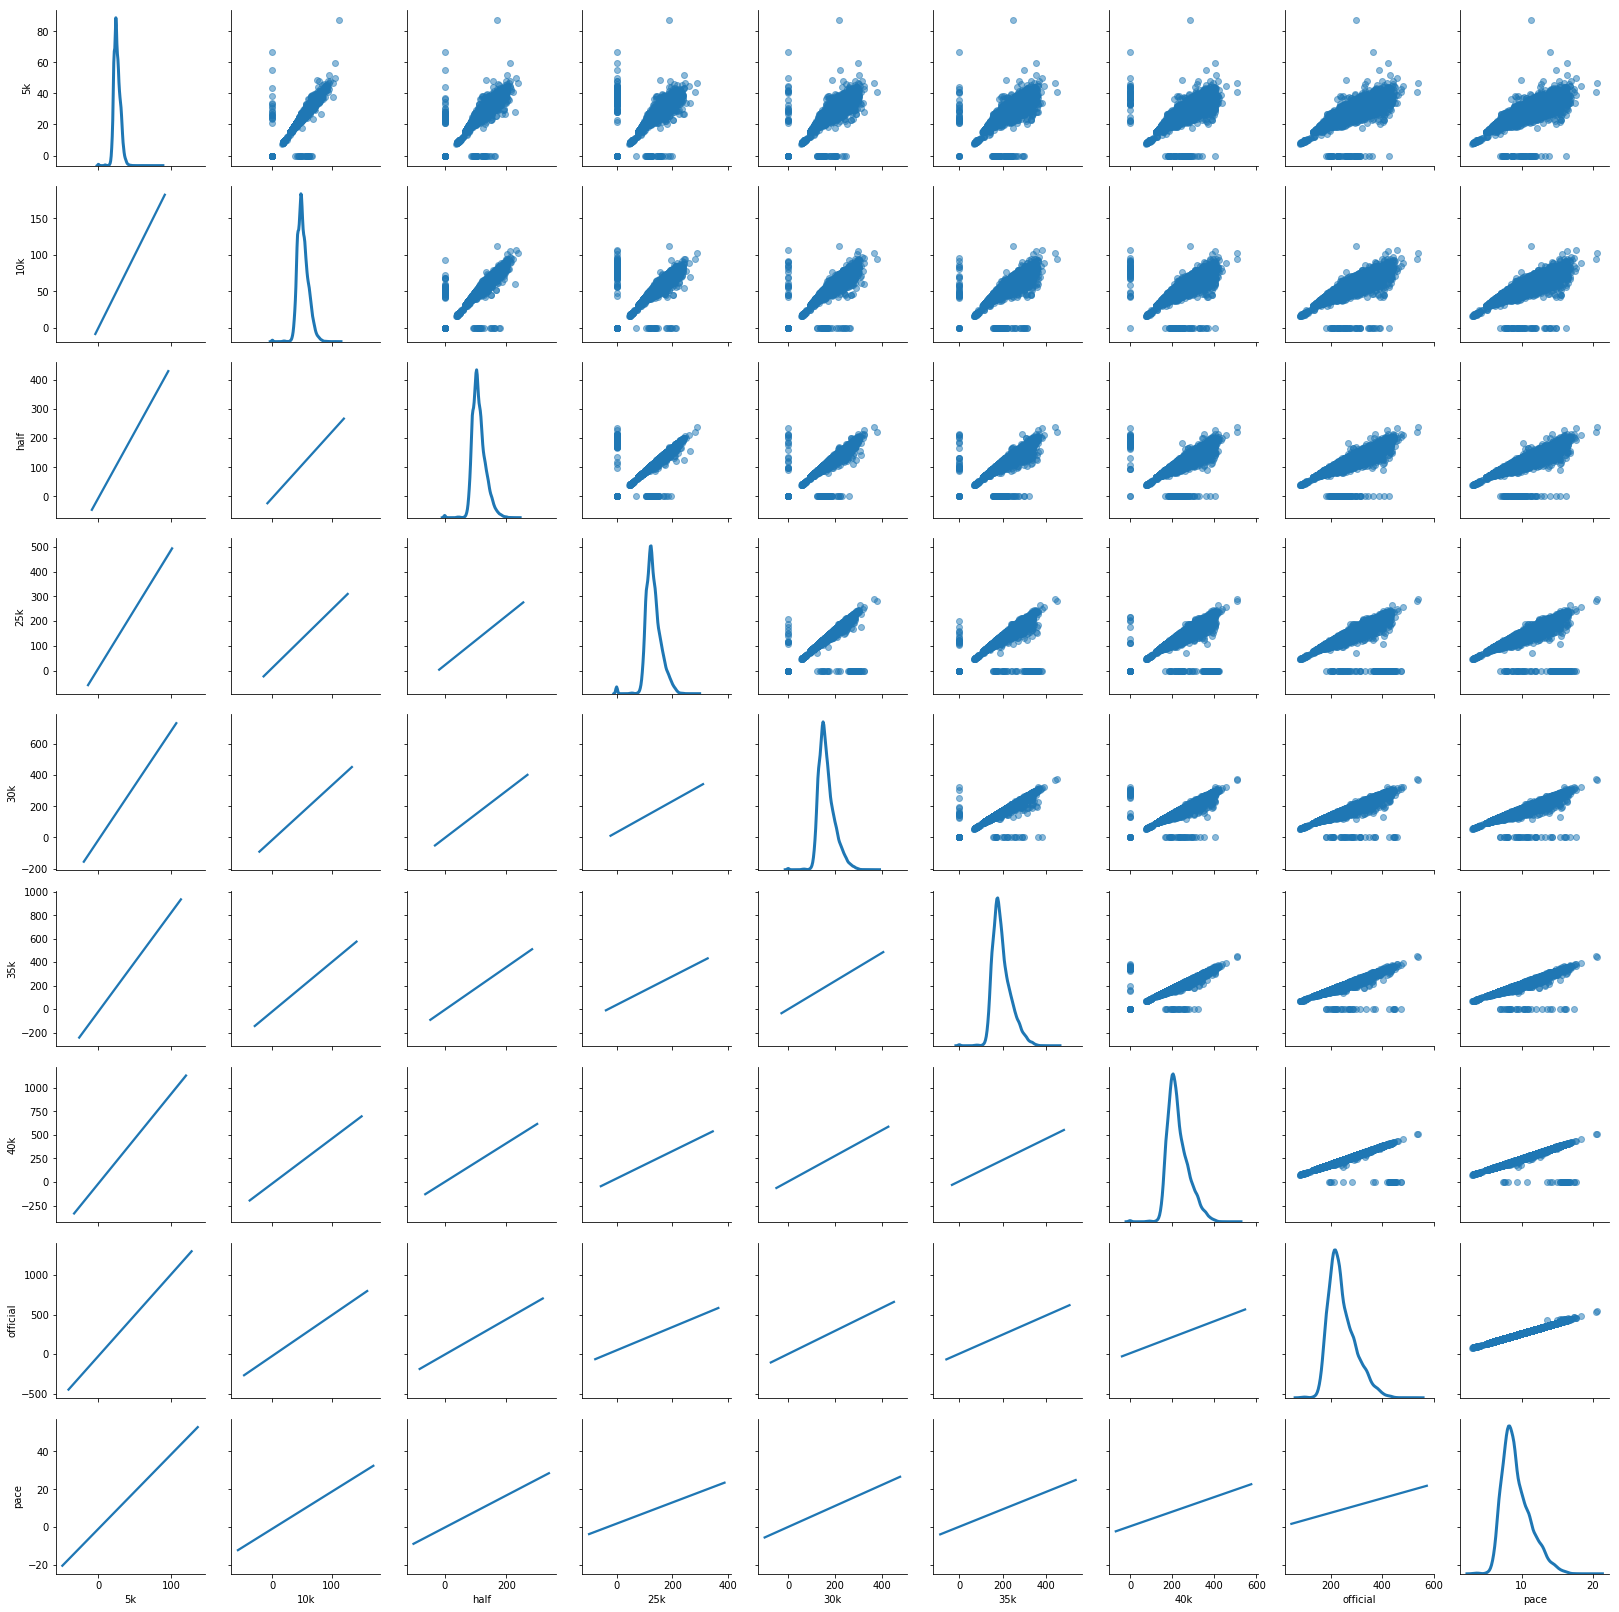

In [57]:
g = sns.PairGrid(marathon[marathon_distance + ['gender']], diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot,lw=3)
plt.show()

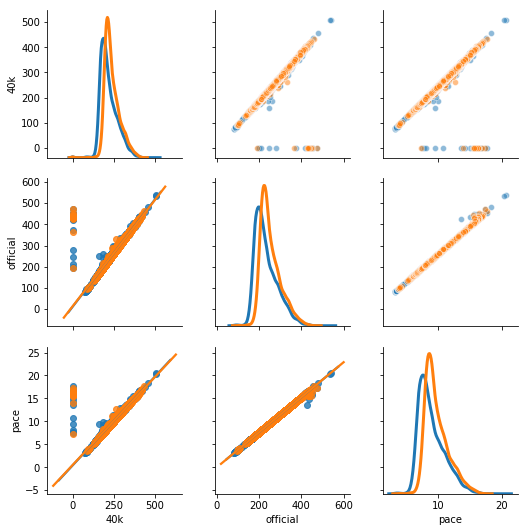

In [63]:
g = sns.PairGrid(marathon[['40k', 'official', 'pace', 'gender']], 
                 hue='gender', 
                 diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=0.5)
g.map_lower(sns.regplot, )
g.map_diag(sns.kdeplot,lw=3)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


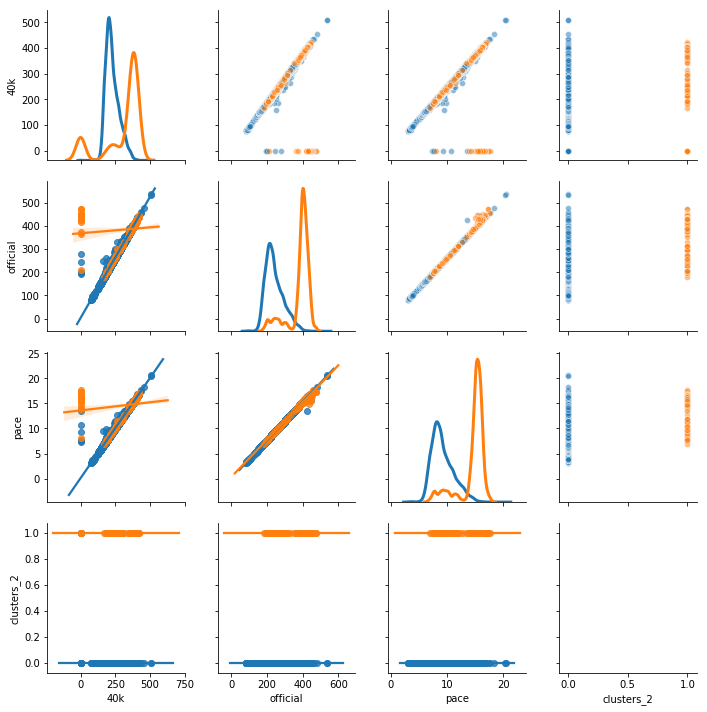

In [67]:
g = sns.PairGrid(marathon[['40k', 'official', 'pace', 'clusters_2']], 
                 hue='clusters_2', 
                 diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=0.5)
g.map_lower(sns.regplot, )
g.map_diag(sns.kdeplot,lw=3)
plt.show()